<a href="https://colab.research.google.com/github/izzyolejnik/Machine-Learning/blob/master/HW3/HW3Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sources:**
https://www.bmc.com/blogs/keras-neural-network-classification/
https://keras.io/layers/about-keras-layers/
https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece
https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as ra 

# **HW3 Pt 1**
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).


In [0]:

def get_random_data(w, b, mu, sigma, m):
  
  # Data and Labels vectors
  data   = np.empty((m,2))
  labels = np.empty((m,))

  for x in range(0, m):
    c = ra.random()
    if(c < .5):
      c = 0
    elif(c >= .5):
      c = 1
    
    # Generate features and n with normal distribution
    x_1 = np.random.uniform(0,1)
    n = np.random.default_rng().normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n

    data[x][0]   = x_1
    data[x][1]   = x_2
    labels[x] = c
  return data, labels

def display_random_data(data, labels):
  # Create an array for colors initially blank
  colors = ["" for x in range(len(labels))]

  # If label is 0, color is blue. If label is 1, color is red.
  for i in range(len(labels)):
    current_label = labels[i]
    if(current_label == 1):
      colors[i] = 'r'
    else:
      colors[i] = 'b'
  # Plot the data and labels
  plt.scatter(data[:,0], data[:,1], c=colors, marker="o")


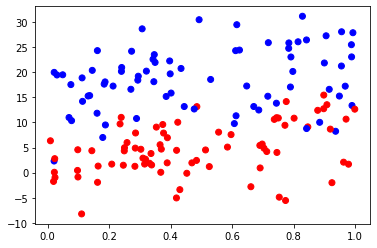

In [0]:
# Using a large value for mu and sigma
data, labels = get_random_data(5,10,7,5,150)
display_random_data(data, labels)

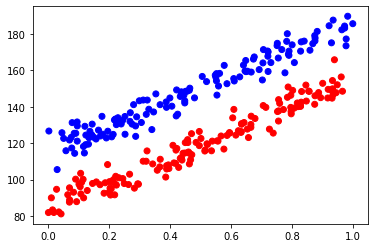

In [0]:
# Using a large value for mu and a small value for sigma
data, labels = get_random_data(70,100,15,5,300)
display_random_data(data, labels)

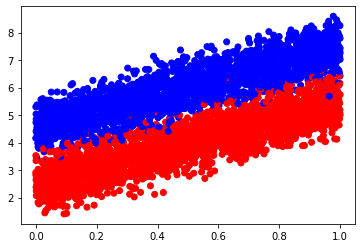

In [0]:
# Using a small value for mu and sigma
data, labels = get_random_data(3,3.5,1,.5,5000)
display_random_data(data, labels)

In [0]:
weight = 3
bias = 3.5
m = 5000

data_train, data_test, label_train, label_test = train_test_split(data, labels, train_size = 0.8, test_size = 0.2)

# **HW3 Pt 2**
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

In [0]:
# Create the model with all the correct layers
model = models.Sequential()
model.add(layers.Dense(1, 
          activation='sigmoid', 
          input_shape=(2,)))
model.compile(optimizer='sgd', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
#history = model.fit(data_test, label_test, epochs = 250, validation_data = (data_train, label_train))
# Train model and then evaulate it

history = model.fit(data_train, label_train, epochs=250, validation_data = (data_test, label_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
125/125 [==============================] - 0s 2ms/step - loss: 1.1976 - accuracy: 0.5155 - val_loss: 0.6794 - val_accuracy: 0.5710
Epoch 2/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5633 - val_loss: 0.6673 - val_accuracy: 0.5820
Epoch 3/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5842 - val_loss: 0.6540 - val_accuracy: 0.6080
Epoch 4/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6070 - val_loss: 0.6424 - val_accuracy: 0.6350
Epoch 5/250
125/125 [==============================] - 0s 2ms/step - loss: 0.6488 

In [0]:
test_loss, test_acc = model.evaluate(data_test, label_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9720


In [0]:
test_acc

0.972000002861023

In [0]:
test_loss

0.15065981447696686

In [0]:
dense_weights, b = model.get_weights()

In [0]:
weight1 = dense_weights[0][0]

In [0]:
weight2 = dense_weights[1][0]

In [0]:
new_bias = b[0]

In [0]:
weights = np.zeros(2)

In [0]:
weights[0] = weight1
weights[1] = weight2

In [0]:
weights

array([ 6.34803247, -2.34862614])

In [0]:
new_bias

8.48495

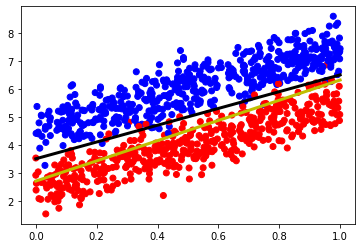

In [0]:
display_random_data(data_test, label_test)
x = np.array(range(0,2))
y = weight * x + bias
plt.plot(x, y, color='black', linewidth=3)

#def predicted_line(weight1, weight2, bias):
#  zero = -(weight1 * 0 + bias) / weight2
#  one = -(weight1 * 1 + bias) / weight2
#  return [[0,1], [zero, one]]
  
def pred(x, w, b):
  p = (-w[0]-b*x)/w[1]
  return p
  
#new_y = predicted_line(weights[0], weights[1], new_bias)
new = pred(x, weights, new_bias)
#print(x2)
plt.plot(new, color='y', linewidth=3)

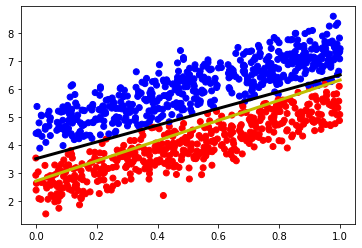

In [0]:
display_random_data(data_test, np.round(model.predict(data_test)))
plt.plot(x, y, color='black', linewidth=3)
plt.plot(new, color='y', linewidth=3)

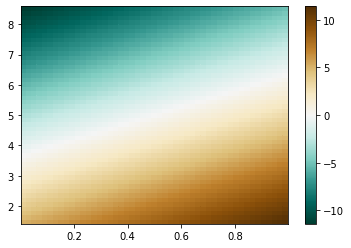

In [0]:
def create_heatmap(weights, bias, data):
  d = data.T
  
  x_1 = pd.DataFrame(d[0][:])
  x_2 = pd.DataFrame(d[1][:])

  c = pd.DataFrame(labels)

  df = pd.concat([x_1, x_2, c], axis = 1)
  df.columns = ['x_1', 'x_2', 'c']

  y, x = np.meshgrid(np.linspace(df['x_2'].min(), df['x_2'].max()), np.linspace(df['x_1'].min(), df['x_1'].max()))
  z = bias+y*weights[1]+x*weights[0]
  z = z[:-1, :-1]
  maxz, minz = np.abs(z).max(), -1*np.abs(z).max()

  hm, axis = plt.subplots()
  c = axis.pcolormesh(x, y, z, vmin=minz, vmax=maxz, cmap='BrBG_r')
  axis.axis([x.min(), x.max(), y.min(), y.max()])
  hm.colorbar(c, ax=axis)

create_heatmap(weights, new_bias, data)

# **HW3 Pt 3**
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

In [0]:
w = 3
b = 3.5
mu = 1
sigma = .5
m = 5000
new_data, new_labels = get_random_data(w, b, mu, sigma, m)

In [0]:
new_data_train, new_data_test, new_label_train, new_label_test = train_test_split(data, labels, train_size = 0.8, test_size = 0.2)

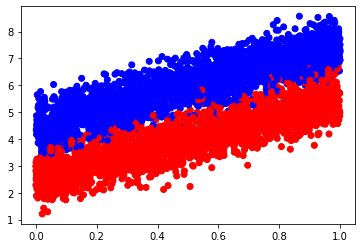

In [0]:
display_random_data(new_data, new_labels)

In [0]:
new_data.shape

(5000, 2)

In [0]:
new_data.size

10000

In [0]:
new_labels.shape

(5000,)

In [0]:
new_labels.size

5000

In [0]:
initial_weights.shape

(3,)

In [0]:
# This function returns values between 0 and 1.
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

In [0]:
def loss_function(y, prediction):
  loss = (-y)*np.log(prediction)-(1-y)*np.log(1-prediction)
  return loss

In [0]:
def stochastic_grad_descent(x, y, lr, epochs):
  samples, features = x.shape
  weights = np.zeros(features+1)
  x = np.append(x, np.ones([len(x), 1]), 1)
  print(x)
  loss = []
  for epoch in range(epochs):
    linear = np.dot(x, weights)
    prediction = sigmoid(linear)
    gradient = (1/samples) * np.dot(x.T, prediction-y)
    weights -= (lr * gradient)
    loss = loss_function(y,prediction)

  return weights, loss

In [0]:
weights, loss = stochastic_grad_descent(new_data, new_labels,.01, 8000)

[[0.2925091  5.47239485 1.        ]
 [0.4209063  5.19474508 1.        ]
 [0.95762929 7.9671923  1.        ]
 ...
 [0.89371777 5.01828788 1.        ]
 [0.66914264 5.77116464 1.        ]
 [0.32550575 5.57599948 1.        ]]


In [0]:
weights

array([ 2.83284057, -1.16896759,  4.21503929])

In [0]:
# Loss 
loss

array([0.22983171, 0.41491605, 0.08805872, ..., 0.34683688, 0.42499257,
       0.22421922])

In [0]:
def pred(x, w):
  p = (-w[2]-w[0]*x)/w[1]
  return p

[3.60577942 6.02914905]


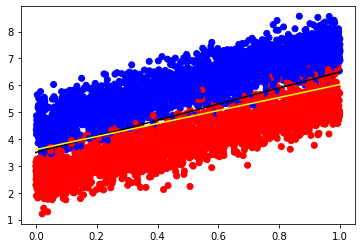

In [0]:
display_random_data(new_data, new_labels)
x = np.array(range(0,2))
actual_line = w * x + b
## Actual line is black
plt.plot(x, actual_line, c='black')
predicted_line = pred(x, weights)
print(predicted_line)
## Predicted line is yellow
plt.plot(predicted_line, c='yellow')

In [0]:
test_weights, test_loss = stochastic_grad_descent(new_data_test, new_label_test, .01, 8000)

[[0.56325073 6.82597632 1.        ]
 [0.84659486 5.48129138 1.        ]
 [0.81774647 5.16813808 1.        ]
 ...
 [0.73464853 7.46436169 1.        ]
 [0.21308677 2.63695044 1.        ]
 [0.87009425 7.08654407 1.        ]]


In [0]:
test_weights

array([ 2.8515755 , -1.16175727,  4.16787922])

In [0]:
test_loss

array([0.10956414, 0.59185256, 0.47576195, 0.60496876, 0.13436354,
       0.28213489, 0.11949571, 0.21020189, 0.42307599, 0.54975536,
       0.28249648, 1.06327739, 0.16663484, 0.15856412, 0.18232114,
       0.12150916, 0.21538676, 0.29476608, 0.06920797, 0.09823042,
       0.26612814, 0.15570958, 0.114542  , 0.35272144, 0.39285195,
       0.31263671, 0.23857581, 0.07299499, 0.17106772, 0.71038421,
       0.19294143, 0.38580037, 0.39722201, 0.19008308, 0.13448286,
       0.13918884, 0.28364325, 1.36878404, 0.46450539, 0.16357898,
       0.17267406, 0.23459006, 0.37577382, 0.3445037 , 0.26004365,
       0.52596083, 0.31350514, 0.681329  , 0.0908571 , 0.33295267,
       0.51729398, 0.21414144, 0.2232896 , 0.16419117, 0.34498691,
       0.12780722, 0.68335488, 0.1470804 , 0.15551738, 0.24211003,
       0.34362629, 0.29713661, 0.12239383, 0.08543367, 0.31486308,
       0.21041884, 0.41640136, 0.45889466, 0.53720714, 0.62834128,
       0.24223731, 0.26666008, 0.10845204, 0.11627322, 0.58507

In [0]:
losses = sum(test_loss)
losses

308.74375992771627

In [0]:
accuracy = 100 - losses/100
accuracy

96.91256240072283

[3.58756456 6.04210095]


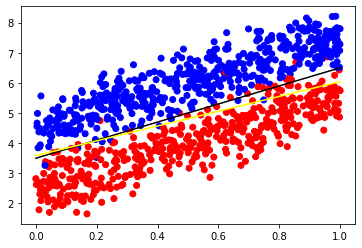

In [0]:
display_random_data(new_data_test, new_label_test)
x = np.array(range(0,2))
actual_line = w * x + b
## Actual line is black
plt.plot(x, actual_line, c='black')
predicted_line = pred(x, test_weights)
print(predicted_line)
## Predicted line is yellow
plt.plot(predicted_line, c='yellow')

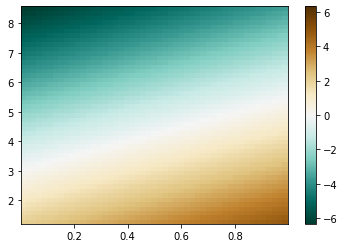

In [0]:
create_heatmap(weights, b, new_data)